In [1]:
import matplotlib
%matplotlib inline
from pylab import *
import os
from readsnapsgl import readsnap
from scipy.stats import binned_statistic as bst
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

k2kev=8.61732814974056E-08
fpath = "/home2/weiguang/MUSIC/MUSIC_PLANCK/" # for orignial data
Mpath = fpath + "GAS_STARS/"
Xpath = fpath + "GAS_STARS_AGN/"
Xspath = "/home2/weiguang/The300/data/simulation/GadgetX/"

safecolor={
    'silver':"#c0c0c0",
    'gray':"#808080",
    'black':"#000000",
    'red':"#ff0000",
    'maroon':"#800000",
    'yellow':"#ffff00",
    'olive':"#707030",
    'lime':"#00ee00",
    'green':"#009000",
    'aqua':"#00eeee",
    'teal':"#00a0a0",
    'blue':"#0000ff",
    'nave':"#000080",
    'fuchsia':"#ff00ff",
    'purple':"#900090"
}

#load halo information for full sample
music=np.load("../Halo_mass_function_mass-difference/MUSIC/Music_Mass_snap_017info.npy")
g3x=np.load("../Halo_mass_function_mass-difference/G3X_Mass_snap_128info.npy")
#regionID[0] hID[1] Mvir[2] Xc[3] Yc[4] Zc[5] Rvir[6] fMhires[7] cNFW[8] M500[9] R500[10] fgas[11] f*[12]
# gzs=np.load("./data/GIZMO_Mass_snap_128_info-AHF.npy")
#ReginIDs[0] HIDs[1] Mvir(2) Xc(3)   Yc(4)   Zc(5)  Rvir(6) fMhires(7) cNFW (8)  M500[9]  R500[10] fgas[11] f*[12] M*30[13] M*50[14] M*0.1R500[15]

1.3848665763945616

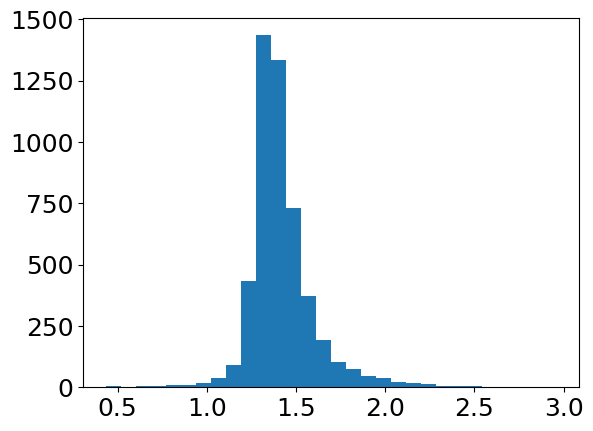

In [4]:
hist(g3x[:,2]/g3x[:,9]/1e10, bins=30)
np.median(g3x[:,2]/g3x[:,9]/1e10)

In [2]:
gzs=np.load('./data/GIZMO_Mbh_snap_128-with_BH-info.npy')
##ReginIDs[0] HIDs[1] HostID[2] Mvir(3) Xc(4)   Yc(5)   Zc(6)  Rvir(7) fMhires(8) cNFW (9) Mgas200[10] M*200[11] M500[12]  R500[13] fgas500[14] f*500[15] 
## M*30[16] M*50[17] M*0.1R500[18] sigma 30[19], sig50[20], sig0.1[21]
## MaxM_BH 30kpc[22] 50kpc[23] 0.1R500[24]; radius to center BH 30kpc[25] 50kpc[26] 0.1R500[27]
gzs[0,25:]

array([4.83459876, 4.83459876, 4.83459876])

In [3]:
TM500 = np.load("../theoretical-check/TM-relations/MUSIC-TM500-fullsample.npy")

TX500 = np.load("../theoretical-check/TM-relations/G3X-TX500-fullsample.npy")

TG500 = np.load("./data/GIZMO-TM500-fullsample.npy")

In [35]:
TG500[:,1],TX500[:,1]

(array([12.778259  ,  2.8430917 ,  2.1868894 , ...,  0.66626835,
         0.5776679 ,  0.50694597], dtype=float32),
 array([11.450795  ,  2.5627012 ,  1.7071861 , ...,  0.6027305 ,
         0.43249243,  0.52437764], dtype=float32))

In [4]:
# fitting data
from scipy.optimize import curve_fit
def funcym(x,a,b):
    return a + b*(x-np.log10(5.))
ids=(TM500[:,2]>1.1)&(TM500[:,0]<4000)
ptMR, pvMR = curve_fit(funcym, np.log10(TM500[~ids,2]), np.log10(TM500[~ids,0]*1.0e10))
ids=(TX500[:,2]>1.1)&(TX500[:,0]<4000)
ptXR, pvXR = curve_fit(funcym, np.log10(TX500[~ids,2]), np.log10(TX500[~ids,0]*1.0e10))
print(10.**ptMR[0]/1.0e14, ptMR[1], pvMR)
print(10.**ptXR[0]/1.0e14, ptXR[1], pvXR)

0.0004840525544308738 1.079001934788303 [[0.0001163  0.00013106]
 [0.00013106 0.00014989]]
0.0006490413048491631 1.178213174119379 [[3.73695553e-05 4.21473394e-05]
 [4.21473394e-05 4.81636328e-05]]


In [5]:
from astropy.modeling import models, fitting
fit = fitting.LevMarLSQFitter()
# g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
# fitted_model_weights = fit(g_init, x, y, weights=1.0/y_uncs)
# g_init = models.custom_model(funcym)
g_init = models.Linear1D()

# #for all data
# MF_weights = fit(g_init, np.log10(music[:,9]*1.0e10/0.6777/6.e14), np.log10(TM500[:,1]))
# print(MF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))
# XF_weights = fit(g_init, np.log10(g3x[:,9]*1.0e10/0.6777/6.e14), np.log10(TX500[:,1]))
# print(XF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))

# # for complete sample
# ids = music[:,9]>46000
# MF_weights = fit(g_init, np.log10(music[ids,9]*1.0e10/0.6777/6.e14), np.log10(TM500[ids,1]))
# print(MF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))
# ids = g3x[:,9]>46000
# XF_weights = fit(g_init, np.log10(g3x[ids,9]*1.0e10/0.6777/6.e14), np.log10(TX500[ids,1]))
# print(XF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))
# ids = gzs[:,12]>4.6e14
# GF_weights = fit(g_init, np.log10(gzs[ids,12]/0.6777/6.e14), np.log10(TG500[ids,1]))
# print(GF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))

# for all data with weight
sigma=np.loadtxt("./data/complete-fraction.txt")
Msig=np.interp(np.log10(music[:,9]*1.0e10),sigma[:,0],sigma[:,1])
Xsig=np.interp(np.log10(g3x[:,9]*1.0e10),sigma[:,0],sigma[:,2])
Zsig=np.interp(np.log10(gzs[:,12]),sigma[:,0],sigma[:,3])
MF_weights = fit(g_init, np.log10(music[:,9]*1.0e10/0.6777/6.e14), np.log10(TM500[:,1]), weights=Msig)
print(MF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))
XF_weights = fit(g_init, np.log10(g3x[:,9]*1.0e10/0.6777/6.e14), np.log10(TX500[:,1]), weights=Xsig)
print(XF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))
# ids=(gzs[:,12]>10**13.)
GF_weights = fit(g_init, np.log10(gzs[:,12]/0.6777/6.e14), np.log10(TG500[:,1]),weights=Zsig)
print(GF_weights,np.sqrt(np.diag(fit.fit_info['param_cov'])))

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.6326753890770485 0.6615170546564089 [0.00254017 0.00058908]
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept    
    ------------------ -----------------
    0.6114301770367454 0.673558902552413 [0.00217657 0.00054941]
Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.5439356935905865 0.7367642284337362 [0.00235144 0.00056713]


In [38]:
Zsig.max(),Xsig.max()

(43.52975897688146, 41.224323799449174)

In [ ]:
GIZMO fit 0.6208706490618513 0.6999203202749446 [0.01395928 0.0032119 ]

In [5]:
# weighted fitting
sigma=np.loadtxt("../../Halo_mass_function_mass-difference/complete-fraction.txt")
Msig=1./np.interp(np.log10(TM500[:,0]*1.0e10),sigma[:,0],sigma[:,1])
Xsig=1./np.interp(np.log10(TX500[:,0]*1.0e10),sigma[:,0],sigma[:,2])

from scipy.optimize import curve_fit
def funcym(x,a,b):
    # fitting formular The same as the YM relation
    return np.log10(10.**a*(10**x/6.e14)**b)
# ids=(TM500[:,2]>1.1)&(TM500[:,0]<4000)
ids=music[:,9]>5000
# ids=TM500[:,0]>5000
# idMs=np.where(np.log10(MY[:,0]*MY[:,2]**2/1000000)-1.7*np.log10(MR500[:,9]/6.0e4/0.6777)<-4)[0]

ptMRw, pvMRw = curve_fit(funcym, np.log10(music[:,9]*1.0e10), np.log10(TM500[:,2]),check_finite=True) #, sigma=Msig, absolute_sigma=False)

# ids=TX500[:,0]>5000
ids=g3x[:,9]>5000
ptXRw, pvXRw = curve_fit(funcym, np.log10(g3x[ids,9]*1.0e10), np.log10(TX500[ids,2])) #, sigma=Xsig[ids], absolute_sigma=True)
print(ptMRw, np.sqrt(np.diag(pvMRw)))
print(ptXRw, np.sqrt(np.diag(pvXRw)))

OSError: ../../Halo_mass_function_mass-difference/complete-fraction.txt not found.

/home2/weiguang/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


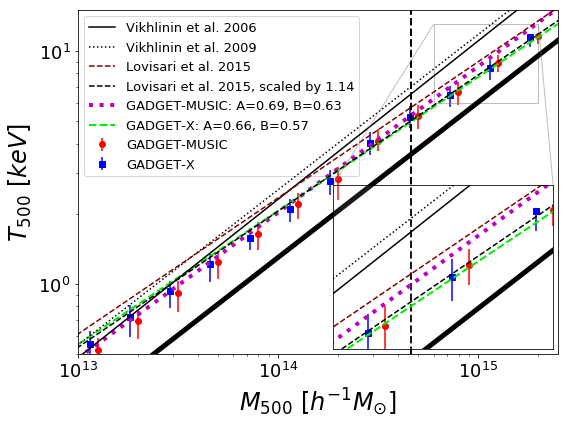

In [29]:
# Plot T-M relation
# from matplotlib import rc
# rc('text',usetex=True)
# rc('text.latex', preamble='\usepackage{color}')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset, zoomed_inset_axes #zoom in plots

from scipy.stats import binned_statistic
def calpu(x):
    return np.percentile(x,85)
def calpd(x):
    return np.percentile(x,15)

fig=figure(1,figsize=(8,6))
ax1=fig.add_subplot(111)
# plot(TM500[:,0]*1.0e10, TM500[:,2], 'o', color=safecolor['red'], ms=2, mec='None',alpha=0.3,label=r'GadgetMUSIC')
# plot(TX500[:,0]*1.0e10, TX500[:,2], 's', color=safecolor['blue'], ms=2, mec='None',alpha=0.3,label=r'GadgetX')

msz=0.5
nbn=10.**np.arange(12.99,15.5,0.2)
# nbn=10.**np.arange(np.log10(0.2),np.log10(15),0.1)

# x=TM500[:,0]*1.0e10
x=music[:,9]*1.0e10
myp=TM500[:,2]
# n, _ = np.histogram(x, bins=nbn)
# my, _ = np.histogram(x, bins=nbn, weights=myp)
# my2, _ = np.histogram(x, bins=nbn, weights=myp*myp)
# n, _, bn = binned_statistic(x, np.ones(x.size), bins=nbn)
my, _, bn = binned_statistic(x, myp,statistic='median', bins=nbn)
my2, _, bn = binned_statistic(x, myp, statistic=calpu, bins=nbn)
my3, m_, bn = binned_statistic(x, myp, statistic=calpd, bins=nbn)
my2-=my; my3=my-my3
ax1.errorbar((m_[1:] + m_[:-1])/2, my, yerr=[my2, my3],ls="none", marker='o',color=safecolor['red'],
             zorder=0, label="GADGET-MUSIC")
# print(n,my,my2)

nbn=10.**np.arange(12.95,15.5,0.2)
# x=TX500[:,0]*1.0e10
x=g3x[:,9]*1.0e10
myp=TX500[:,2]
# n, _ = np.histogram(x, bins=nbn)
xy, _, bn = binned_statistic(x, myp,statistic='median', bins=nbn)
xy2, _, bn = binned_statistic(x, myp, statistic=calpu, bins=nbn)
xy3, _, bn = binned_statistic(x, myp, statistic=calpd, bins=nbn)
xy2-=xy; xy3=xy-xy3
ax1.errorbar((_[1:] + _[:-1])/2, xy, yerr=[xy2, xy3],ls="none", marker='s',color=safecolor['blue'],
             zorder=0, label="GADGET-X")

#My fitting
x = np.arange(13, 15.9, 0.1)
# plot(10.**x, 10.**funcym(x, *ptMRw), ':',color='m', lw=4,
#      label='GadgetMUSIC: A='+str(ptMRw[0]+0.005)[:4]+', B='+str(ptMRw[1]+0.005)[:4])
# plot(10.**x, 10.**funcym(x, *ptXRw), '--',color=safecolor['lime'],lw=2,
#      label=r'GadgetX: A='+str(ptXRw[0]+0.005)[:4]+', B='+str(ptXRw[1]+0.005)[:4])
ax1.plot(10.**x, 10.**MF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), ':',color='m', lw=4, 
         label='GADGET-MUSIC: A='+str(MF_weights.intercept.value+0.005)[:4]+', B='+str(MF_weights.slope.value+0.005)[:4])
ax1.plot(10.**x, 10.**XF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), '--',color=safecolor['lime'],lw=2,
         label=r'GADGET-X: A='+str(XF_weights.intercept.value+0.005)[:4]+', B='+str(XF_weights.slope.value+0.005)[:4])

# My fitting results with function M_0 (T/5keV)^{a}
# M500 = 4.234e14 * (T/5.)**1.56
# plot(T,M500,'k--', lw=3, dashes=(10, 10), label="GadgetMUSIC: a=4.23; b=1.56")
# M500 = 4.223e14 * (T/5.)**1.645
# plot(T,M500,'--', lw=3, dashes=(10, 5, 5, 5), color=safecolor['aqua'], label="GadgetX: a=4.22; b=1.65")

T=np.arange(0.1,20,0.1)
#observational data
# Vikhlinin et al. 2006 Fig. 19 
# Table 5 (mass weighted relation) M_5 = 3.32e14 [M_{sun}/h]; \alpha = 1.47. 
# h(z)M = M_5 (T/5keV)^{\alpha} h = 0.72
M500 = 3.32e14/0.72 * (T/5.)**1.47 *0.6777
ax1.plot(M500, T, 'k-', label="Vikhlinin et al. 2006")

# Vikhlinin 2009
# M500 − TX M500 = M0(T/5 keV)^α E(z)−1   M0: (2.95 ± 0.10) × 1014 [h−1 M_*]    α: 1.5,
M500 = 2.95e14/0.72*(T/5.)**1.5*0.6777
ax1.plot(M500,T,'k:', label="Vikhlinin et al. 2009")

# M500 = 1.27e14/0.73*(T/3.)**1.6*0.6777
# plot(M500,T,'-.', color=safecolor['purple'], label="Sun et al. 2009")

# Lovisari, et al. 2015 
# log(Y/C1) = a · log(X/C2) + b,     M−T: C1 [5 × 1013 h−1 70 M_*] C2 [2 keV]    a 1.71 ± 0.04 b 0.20 ± 0.02
x = np.arange(13, 15.9, 0.1)
T = 10.**((np.log10(10**x/5.0e13*0.7)-0.2)/1.71)*2
ax1.plot(10**x*0.6777, T, '--', color=safecolor['maroon'], label="Lovisari et al. 2015")
ax1.plot(10**x*0.6777, T/1.14, '--', color=safecolor['black'], label="Lovisari et al. 2015, scaled by 1.14")

ax1.plot([4.62e14,4.62e14],[0.5,18],'k--',lw=2)
ax1.plot(10**x*0.6777, (10.**x/1.0e14)**(2./3.), 'k-',lw=5)

handles, labels = gca().get_legend_handles_labels()
order = [2,3,4,5,0,1,6,7]
l=legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,ncol=1,fontsize=13)
# l=ax1.legend(loc=2,ncol=1,fontsize=13, markerscale=1.) #,fontsize=18
l.zorder=-10

# inside plot
axins = zoomed_inset_axes(ax1, 2.1, loc=4)
axins.errorbar((m_[1:] + m_[:-1])/2, my, yerr=[my2, my3],ls="none", marker='o',color=safecolor['red'],
                zorder=0, label="GADGET-MUSIC")
axins.errorbar((_[1:] + _[:-1])/2, xy, yerr=[xy2, xy3],ls="none", marker='s',color=safecolor['blue'],
                zorder=0, label="GADGET-X")
axins.plot(10.**x, 10.**MF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), ':',color='m', lw=4)
axins.plot(10.**x, 10.**XF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), '--',color=safecolor['lime'],lw=2)
M500 = 3.32e14/0.72 * (T/5.)**1.47 *0.6777
axins.plot(M500, T, 'k-', label="Vikhlinin et al. 2006")
M500 = 2.95e14/0.72*(T/5.)**1.5*0.6777
axins.plot(M500,T,'k:', label="Vikhlinin et al. 2009")
x = np.arange(13, 15.9, 0.1)
T = 10.**((np.log10(10**x/5.0e13*0.7)-0.2)/1.71)*2
axins.plot(10**x*0.6777, T, '--', color=safecolor['maroon'])
axins.plot(10**x*0.6777, T/1.14, '--', color=safecolor['black'])
axins.plot([4.62e14,4.62e14],[0.5,18],'k--',lw=2)
axins.plot(10**x*0.6777, (10.**x/1.0e14)**(2./3.), 'k-',lw=5)
axins.set_xlim(6e14, 2.0e15)
axins.set_ylim(6, 13)
axins.set_yscale('log')
axins.set_xscale('log')
axins.get_yaxis().set_visible(False)
axins.get_xaxis().set_visible(False)
# axins.set_zorder(0)
axins.patch.set_alpha(0.1) # tick_params(zorder=-10,)
mark_inset(ax1, axins, loc1=1, loc2=2, fc="none", ec="0.5", alpha=0.5)

ax1.set_xlabel("$M_{500}\ [h^{-1} M_{\odot}]$",fontsize=24)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_ylabel("$T_{500} \ [keV]$",fontsize=24)
ax1.set_xlim(10.**13.,10.**15.4)
ax1.set_ylim(0.5,15)
ax1.tick_params(axis='both', which='major', labelsize=18)
# ax1.set_xticks(fontsize=16)
# ax1.set_yticks(fontsize=16)
fig.tight_layout()
# savefig("T-M-relations.pdf",dpi=300)

<ipython-input-6-f14408195170>:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


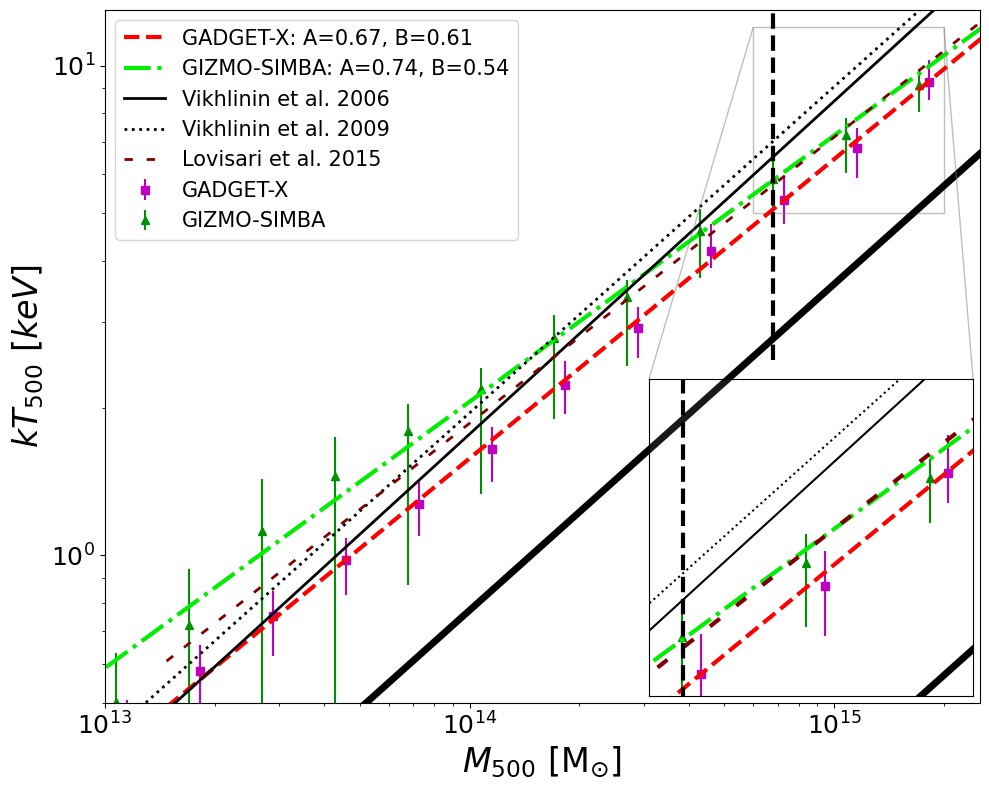

In [6]:
# Plot T-M relation
# from matplotlib import rc
# rc('text',usetex=True)
# rc('text.latex', preamble='\usepackage{color}')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset, zoomed_inset_axes #zoom in plots

from scipy.stats import binned_statistic
def calpu(x):
    return np.percentile(x,85)
def calpd(x):
    return np.percentile(x,15)

fig=figure(1,figsize=(10,8))
ax1=fig.add_subplot(111)
# plot(TM500[:,0]*1.0e10, TM500[:,2], 'o', color=safecolor['red'], ms=2, mec='None',alpha=0.3,label=r'GadgetMUSIC')
# plot(TX500[:,0]*1.0e10, TX500[:,2], 's', color=safecolor['blue'], ms=2, mec='None',alpha=0.3,label=r'GadgetX')

msz=0.5
nbn=10.**np.arange(12.99,15.5,0.2)
# nbn=10.**np.arange(np.log10(0.2),np.log10(15),0.1)

# x=TM500[:,0]*1.0e10
# x=music[:,9]*1.0e10
# myp=TM500[:,1]
# my, _, bn = binned_statistic(x, myp,statistic='median', bins=nbn)
# my2, _, bn = binned_statistic(x, myp, statistic=calpu, bins=nbn)
# my3, m_, bn = binned_statistic(x, myp, statistic=calpd, bins=nbn)
# my2-=my; my3=my-my3
# ax1.errorbar((m_[1:] + m_[:-1])/2, my, yerr=[my2, my3],ls="none", marker='o',color=safecolor['red'],
#              zorder=0, label="GADGET-MUSIC")
# print(n,my,my2)

nbn=10.**np.arange(12.95,15.5,0.2)
# x=TX500[:,0]*1.0e10
x=g3x[:,9]*1.0e10/0.6777
myp=TX500[:,1]
# n, _ = np.histogram(x, bins=nbn)
xy, _, bn = binned_statistic(x, myp,statistic='median', bins=nbn)
xy2, _, bn = binned_statistic(x, myp, statistic=calpu, bins=nbn)
xy3, x_, bn = binned_statistic(x, myp, statistic=calpd, bins=nbn)
xy2-=xy; xy3=xy-xy3
ax1.errorbar((_[1:] + _[:-1])/2, xy, yerr=[xy2, xy3],ls="none", marker='s',color='m',
             zorder=0, label="GADGET-X")

nbn=10.**np.arange(12.92,15.5,0.2)
# x=TX500[:,0]*1.0e10
x=gzs[:,12]/0.6777
myp=TG500[:,1]
# n, _ = np.histogram(x, bins=nbn)
gy, _, bn = binned_statistic(x, myp,statistic='median', bins=nbn)
gy2, _, bn = binned_statistic(x, myp, statistic=calpu, bins=nbn)
gy3, g_, bn = binned_statistic(x, myp, statistic=calpd, bins=nbn)
gy2-=xy; gy3=gy-gy3
ax1.errorbar((_[1:] + _[:-1])/2, gy, yerr=[gy2, gy3],ls="none", marker='^',color=safecolor['green'], 
             zorder=0, label="GIZMO-SIMBA")

#My fitting
x = np.arange(12, 15.9, 0.1)
# plot(10.**x, 10.**funcym(x, *ptMRw), ':',color='m', lw=4,
#      label='GadgetMUSIC: A='+str(ptMRw[0]+0.005)[:4]+', B='+str(ptMRw[1]+0.005)[:4])
# plot(10.**x, 10.**funcym(x, *ptXRw), '--',color=safecolor['lime'],lw=2,
#      label=r'GadgetX: A='+str(ptXRw[0]+0.005)[:4]+', B='+str(ptXRw[1]+0.005)[:4])
# ax1.plot(10.**x, 10.**MF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), ':',color='m', lw=4, 
#          label='GADGET-MUSIC: A='+str(MF_weights.intercept.value+0.005)[:4]+', B='+str(MF_weights.slope.value+0.005)[:4])
ax1.plot(10.**x/0.6777, 10.**XF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), '--',color=safecolor['red'],lw=3,
         label=r'GADGET-X: A='+str(XF_weights.intercept.value+0.005)[:4]+', B='+str(XF_weights.slope.value+0.005)[:4])
ax1.plot(10.**x/0.6777, 10.**GF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), '-.',color=safecolor['lime'],lw=3,
         label=r'GIZMO-SIMBA: A='+str(GF_weights.intercept.value+0.005)[:4]+', B='+str(GF_weights.slope.value+0.005)[:4])


# My fitting results with function M_0 (T/5keV)^{a}
# M500 = 4.234e14 * (T/5.)**1.56
# plot(T,M500,'k--', lw=3, dashes=(10, 10), label="GadgetMUSIC: a=4.23; b=1.56")
# M500 = 4.223e14 * (T/5.)**1.645
# plot(T,M500,'--', lw=3, dashes=(10, 5, 5, 5), color=safecolor['aqua'], label="GadgetX: a=4.22; b=1.65")

T=np.arange(0.1,20,0.1)
#observational data
# Vikhlinin et al. 2006 Fig. 19 
# Table 5 (mass weighted relation) M_5 = 3.32e14 [M_{sun}/h]; \alpha = 1.47. 
# h(z)M = M_5 (T/5keV)^{\alpha} h = 0.72
M500 = 3.32e14/0.72 * (T/5.)**1.47 # *0.6777
ax1.plot(M500, T, 'k-', label="Vikhlinin et al. 2006",lw=2)

# Vikhlinin 2009
# M500 − TX M500 = M0(T/5 keV)^α E(z)−1   M0: (2.95 ± 0.10) × 1014 [h−1 M_*]    α: 1.5,
M500 = 2.95e14/0.72*(T/5.)**1.5 #*0.6777
ax1.plot(M500,T,'k:', label="Vikhlinin et al. 2009",lw=2)

# M500 = 1.27e14/0.73*(T/3.)**1.6*0.6777
# plot(M500,T,'-.', color=safecolor['purple'], label="Sun et al. 2009")

# Lovisari, et al. 2015 
# log(Y/C1) = a · log(X/C2) + b,     M−T: C1 [5 × 1013 h−1 70 M_*] C2 [2 keV]    a 1.71 ± 0.04 b 0.20 ± 0.02
x = np.arange(13, 15.9, 0.1)
T = 10.**((np.log10(10**x/0.6777/5.0e13*0.7)-0.2)/1.71)*2
ax1.plot(10**x/0.6777, T, ls=(0, (3, 5)), color=safecolor['maroon'], label="Lovisari et al. 2015",lw=2)
# ax1.plot(10**x/0.6777, T/1.14, ls=(0, (3, 5)), color=safecolor['black'], label="Lovisari et al. 2015, scaled by 1.14",lw=2)

ax1.plot([4.62e14/0.6777,4.62e14/0.6777],[2.5,18],'k--',lw=3)
ax1.plot(10**x/0.6777, (10.**x/1.0e14)**(2./3.), 'k-',lw=5)

# handles, labels = gca().get_legend_handles_labels()
# order = [2,3,4,5,0,1,6,7,8,9]
# l=legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=2,ncol=1,fontsize=13)
# l=ax1.legend(loc=2,ncol=1,fontsize=13, markerscale=1.) #,fontsize=18
# l.zorder=-10
legend(loc=2,fontsize=15)

# inside plot
axins = zoomed_inset_axes(ax1, 1.7, loc=4)
# axins.errorbar((m_[1:] + m_[:-1])/2, my, yerr=[my2, my3],ls="none", marker='o',color=safecolor['red'],
#                 zorder=0, label="GADGET-MUSIC")
axins.errorbar((x_[1:] + x_[:-1])/2, xy, yerr=[xy2, xy3],ls="none", marker='s',color='m',
                zorder=0, label="GADGET-X")
axins.errorbar((g_[1:] + g_[:-1])/2, gy, yerr=[gy2, gy3],ls="none", marker='^',color=safecolor['green'],
                zorder=0, label="GADGET-X")

# axins.plot(10.**x, 10.**MF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), ':',color='m', lw=4)
axins.plot(10.**x/0.6777, 10.**XF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), '--',color=safecolor['red'],lw=3)
axins.plot(10.**x/0.6777, 10.**GF_weights(x-np.log10(0.6777)-np.log10(6.0e14)), '-.',color=safecolor['lime'],lw=3)

M500 = 3.32e14/0.72 * (T/5.)**1.47 # *0.6777
axins.plot(M500, T, 'k-', label="Vikhlinin et al. 2006")
M500 = 2.95e14/0.72*(T/5.)**1.5 #*0.6777
axins.plot(M500,T,'k:', label="Vikhlinin et al. 2009")
x = np.arange(13, 15.9, 0.1)
T = 10.**((np.log10(10**x/0.6777/5.0e13*0.7)-0.2)/1.71)*2
axins.plot(10**x/0.6777, T, ls=(0, (3, 5)), color=safecolor['maroon'],lw=3)
# axins.plot(10**x/0.6777, T/1.14, ls=(0, (3, 5)), color=safecolor['black'],lw=3)
axins.plot([4.62e14/0.6777,4.62e14/0.6777],[0.5,18],'k--',lw=3)
axins.plot(10**x/0.6777, (10.**x/1.0e14)**(2./3.), 'k-',lw=5)
axins.set_xlim(6e14, 2.0e15)
axins.set_ylim(5, 12)
axins.set_yscale('log')
axins.set_xscale('log')
axins.get_yaxis().set_visible(False)
axins.get_xaxis().set_visible(False)
# axins.set_zorder(0)
axins.patch.set_alpha(0.1) # tick_params(zorder=-10,)
mark_inset(ax1, axins, loc1=1, loc2=2, fc="none", ec="0.5", alpha=0.5)

ax1.set_xlabel(r'$M_{500}\ [{\rm M}_{\odot}]$',fontsize=24)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_ylabel("$kT_{500} \ [keV]$",fontsize=24)
ax1.set_xlim(10.**13.,10.**15.4)
ax1.set_ylim(0.5,13)
ax1.tick_params(axis='both', which='major', labelsize=18)
# ax1.set_xticks(fontsize=16)
# ax1.set_yticks(fontsize=16)
fig.tight_layout()
savefig("plots/T-M-relations-GS.pdf",dpi=300)